### 案例1——简单的黑白边界检测

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import paddle
from paddle.nn import Conv2D
from paddle.nn.initializer import Assign
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

<font color="red">**设置宽度方向的卷积核为[1,0,-1]，此卷机核会将宽度方向间隔为1的两个像素点数值相减**</font>

In [5]:
# 创建初始化权重参数w
w = np.array([1,0,-1],dtype='float32')
# 将权重参数调整成维度为[cout,cin,kh,kw]的四维张量
w = w.reshape([1,1,1,3])
# 创建卷积算子，设置输出通道数，卷积核大小，和初始化权重参数
# 创建卷积算子的时候，从 numpy.ndarray初始化卷积参数
conv = Conv2D(in_channels=1,out_channels=1,kernel_size=[1,3],weight_attr=paddle.ParamAttr(
    initializer=Assign(value=w)
))


In [12]:
w

array([[[[ 1.,  0., -1.]]]], dtype=float32)

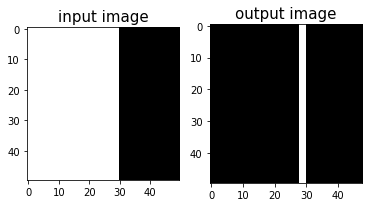

In [9]:
# 穿件输入图片
img = np.ones([50,50],dtype="float32")
img[:,30:] = 0.
# 将图片调整为[N,C,H,W]的形式
x = img.reshape([1,1,50,50])
# 将numpy.ndarray转化为paddle中的tensor
x = paddle.to_tensor(x)
# 将卷积算子作用在图片上
y = conv(x)
# 将输出的tensor转化为numpy.ndarray
out = y.numpy()
f = plt.subplot(121)
f.set_title('input image',fontsize=15)
plt.imshow(img,cmap='gray')
f = plt.subplot(122)
f.set_title('output image',fontsize=15)
plt.imshow(out.squeeze(),cmap="gray")
plt.show()

In [11]:
# out.squeeze()